In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [3]:
from src.data_loader import ViTDataLoader
from src.vit_train import load_model_dir, ViTTrainer
from src.vit_data import load_cd_data_24x128

model_dir = 'output/cd_24x128_more_complex_20220628_6deb'

vit, config = load_model_dir(model_dir, legacy=False)
vit_data = load_cd_data_24x128()
config_name = "more_complex"

dataloader = ViTDataLoader(vit_data, split_type=config.SPLIT_TYPE, split_arg=config.SPLIT_ARG, 
                           valid_type=config.VALIDATION_TYPE, valid_arg=config.VALIDATION_ARG)
print(dataloader.split_repr())

trainer = ViTTrainer(vit, config_name, dataloader, resume=True, resume_path=model_dir)


Split: time,120; Training: 22135; Validation: 0; Testing: 4427


In [4]:
trainer.setup()

Resuming from 6010...


In [5]:
trainer.compute_predictions_losses()

In [6]:
print(trainer.perf_str)

Loss:
  Train:	0.007
  Valid:	nan
  Test: 	0.294

R2:
  Train:	0.993
  Valid:	nan
  Test: 	0.681


0

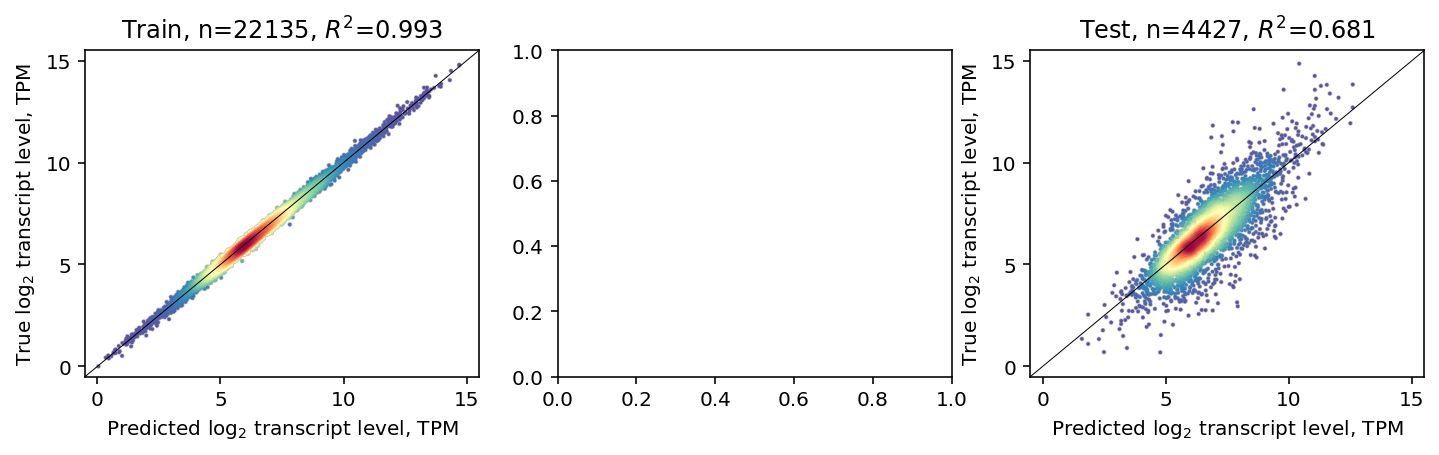

In [7]:
trainer.plot_predictions()
0

0.6814404605960929

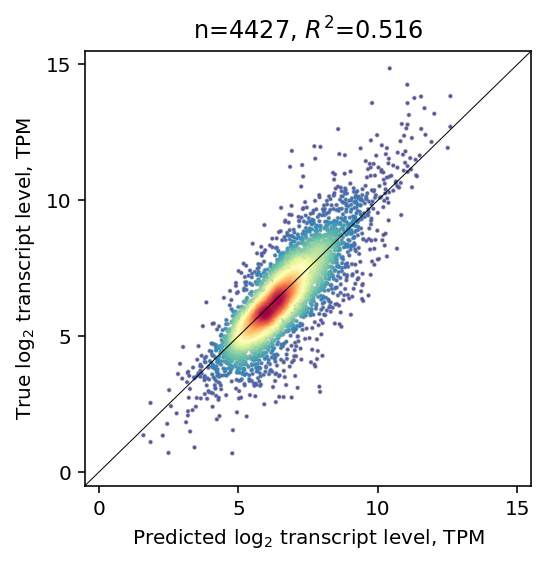

In [8]:
from src.vit_viz import plot_scatter_predicted_true
from sklearn.metrics import r2_score

plt.figure(figsize=(4, 4))

y = vit_data.unscale_log_tx(trainer.test_tx)
x = vit_data.unscale_log_tx(trainer.test_predictions)

test_r2 = plot_scatter_predicted_true(x, y)
r2_score(trainer.test_tx, trainer.test_predictions)


In [9]:
tpm_df = vit_data.read_log_tpm_data()

In [10]:
tpm_df.head(2)

time,0.0,7.5,15.0,30.0,60.0,120.0
orf_name,,,,,,
YAL001C,5.018297,4.690297,5.358192,5.635665,5.786156,5.906502
YAL002W,4.920433,4.960072,5.729812,6.254715,6.613016,6.581889


In [11]:
orf_names = trainer.dataloader.testloader.dataset[:][2]
data = pd.DataFrame(index=orf_names, data={'true': y, 'predicted': x})
data['diff'] = np.abs(data.true - data.predicted)

data = data.join(tpm_df)
data['diff_60'] = np.abs(data[60.0] - data['true'])


In [12]:

data[(data['diff'] < 2) & (data['true'] > 10)].sort_values('diff_60', ascending=False).head(2)

,true,predicted,diff,0.0,7.5,15.0,30.0,60.0,120.0,diff_60
YER103W,10.257915,8.439111,1.818804,3.977019,6.318531,10.399175,10.018035,7.664742,10.257915,2.593172
YGR142W,10.040294,8.297774,1.742520,4.082856,10.205165,11.542765,6.209453,7.725488,10.040294,2.314807


In [14]:
from src.rna_plotter import load_rna_plotter
from src.orf_plotter import ORFAnnotationPlotter

orf_plotter = ORFAnnotationPlotter()
rna_plotter = load_rna_plotter()
trainer.orf_plotter = orf_plotter
trainer.rna_plotter = rna_plotter


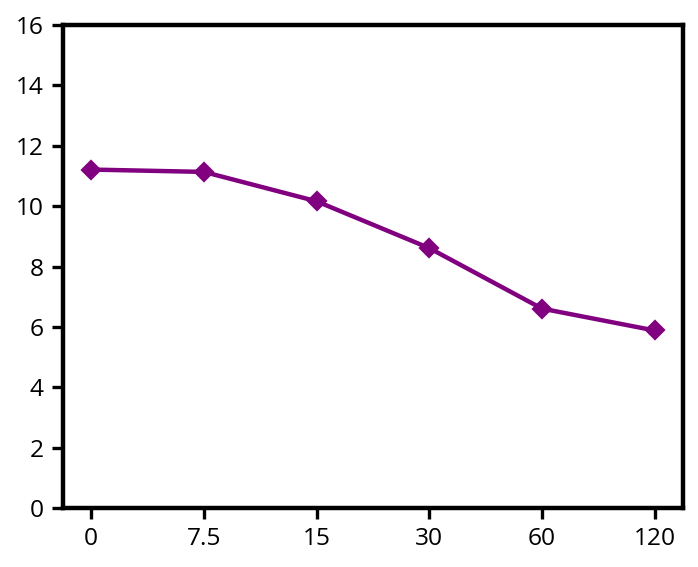

In [34]:
from src.vit_viz import plot_gene_tpm

plot_gene_tpm('RPS7A', vit_data)


0

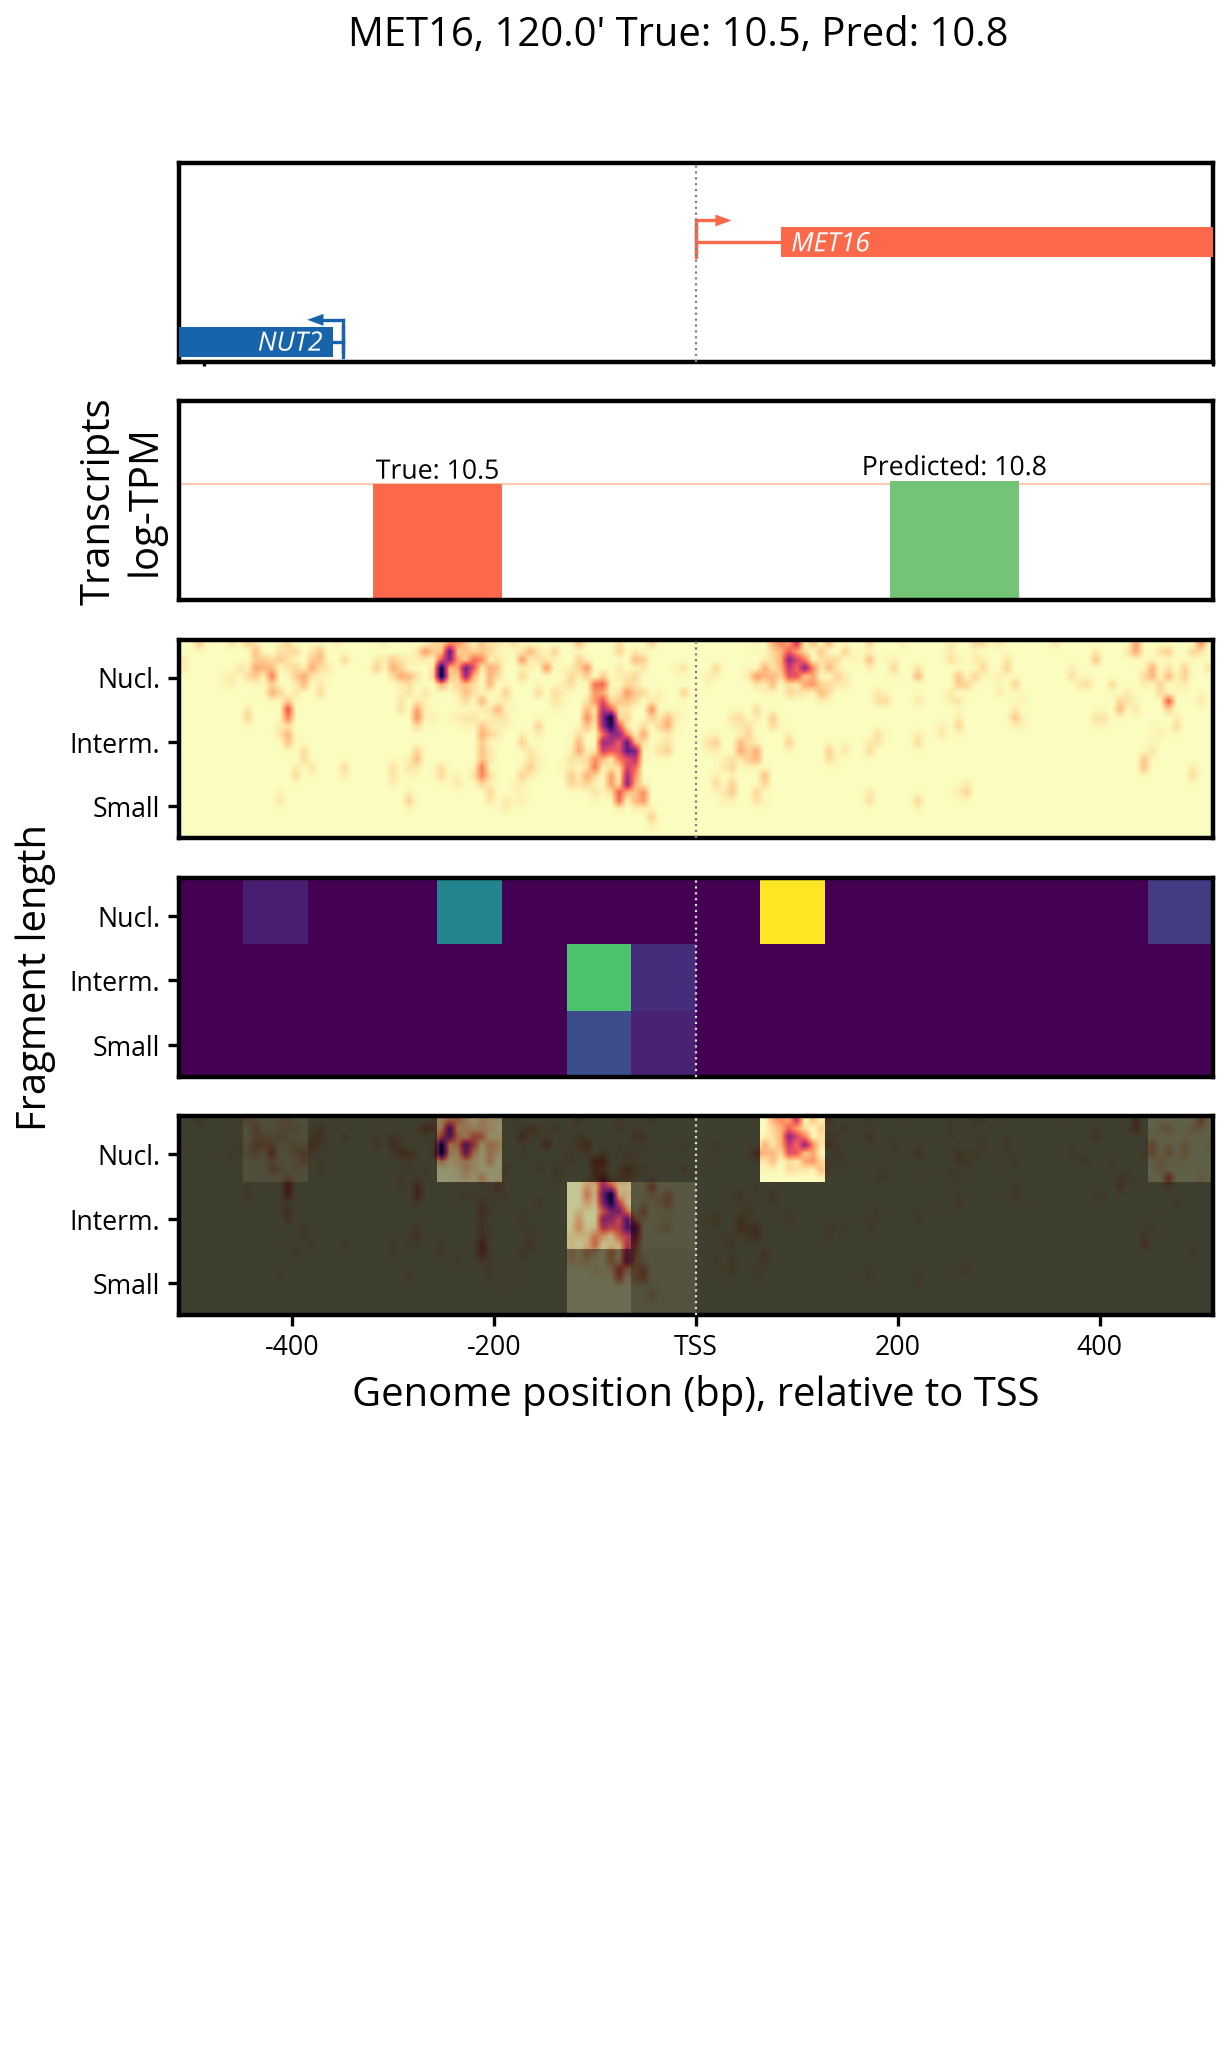

In [37]:
from src.vit_viz import plot_gene_prediction

trainer.plot_gene('MET16', 120.0)
0

0

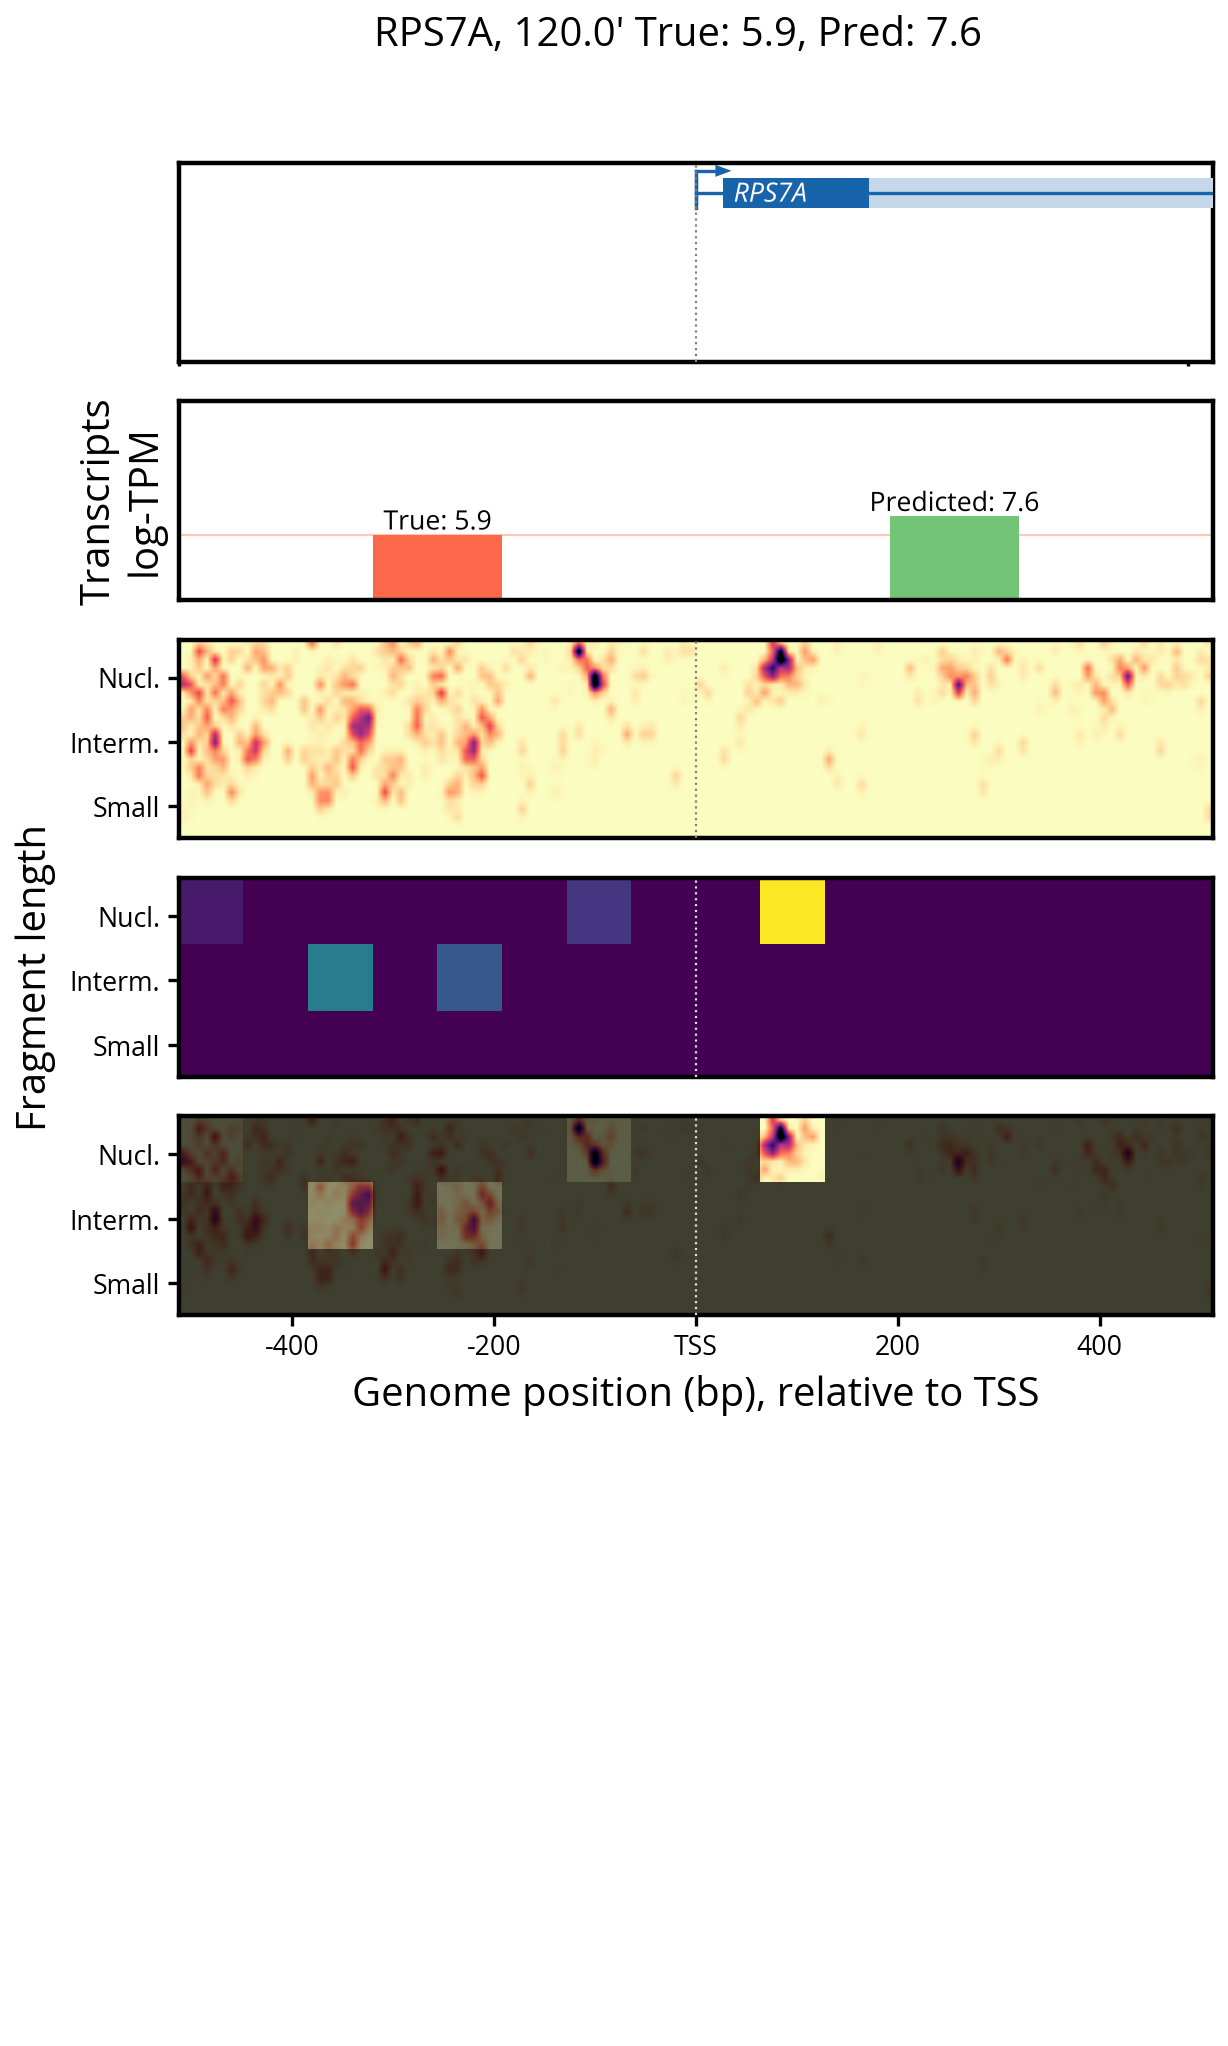

In [35]:
from src.vit_viz import plot_gene_prediction

trainer.plot_gene('RPS7A', 120.0)
0

In [25]:
trainer.compute_attentions()

1/26562 - 00:00:00.05
1001/26562 - 00:01:07.12
2001/26562 - 00:02:16.81
3001/26562 - 00:03:22.45
4001/26562 - 00:04:28.04
5001/26562 - 00:05:32.06
6001/26562 - 00:06:36.95
7001/26562 - 00:07:42.38
8001/26562 - 00:08:48.08
9001/26562 - 00:09:52.98
10001/26562 - 00:10:58.55
11001/26562 - 00:12:03.57
12001/26562 - 00:13:08.79
13001/26562 - 00:14:13.83
14001/26562 - 00:15:21.71
15001/26562 - 00:16:25.10
16001/26562 - 00:17:32.01
17001/26562 - 00:18:35.84
18001/26562 - 00:19:39.08
19001/26562 - 00:20:42.87
20001/26562 - 00:22:00.59
21001/26562 - 00:23:04.42
22001/26562 - 00:24:07.93
23001/26562 - 00:25:12.04
24001/26562 - 00:26:15.68
25001/26562 - 00:27:19.26
26001/26562 - 00:31:21.17


array([[[1.75506324e-02, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.89584851e-01, 1.36823412e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.68135483e-02, 4.32060868e-01, 1.76107530e-02],
        [4.12795216e-01, 0.00000000e+00, 4.19805348e-02, ...,
         0.00000000e+00, 0.00000000e+00, 1.28618805e-02]],

       [[1.17117735e-02, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 7.15568433e-07],
        [2.42655072e-02, 5.01133618e-04, 3.70630845e-02, ...,
         1.08176321e-02, 0.00000000e+00, 1.21653052e-02],
        [6.18502736e-01, 0.00000000e+00, 0.00000000e+00, ...,
         3.33544374e-01, 4.16783523e-03, 2.05375832e-02]],

       [[8.57113674e-03, 2.12267078e-02, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.31476484e-02, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 8.67024437e-03],
        [6.10457122e-01, 1.93289176e

In [43]:
from einops.layers.torch import Rearrange
import torch

vectorize_att = Rearrange('b (r) (c) -> b (r c)')
atts_vectorized = vectorize_att(torch.Tensor(trainer.collected_attentions)).numpy()
atts_vectorized.shape

(26562, 48)

In [82]:
idx_120 = np.arange(len(atts_vectorized))[vit_data.times == 120]

atts_120 = trainer.collected_attentions[idx_120]
atts_vec_120 = atts_vectorized[idx_120]
orfs_120 = trainer.dataloader.dataset.orfs[idx_120]

In [155]:
from sklearn.cluster import KMeans

c = 4

kmeans = KMeans(n_clusters=c, random_state=1).fit(atts_vec_120)
cd_120_cluster_labels = kmeans.labels_


In [156]:
def plot_tpm_cluster_idx(trainer, orfs_120, current_idx):
    quantiles = trainer.dataloader.dataset.read_log_tpm_data().loc[orfs_120[current_idx]].quantile([0., 0.5, 1.0])

    for i in range(len(quantiles.columns)):
        time = quantiles.columns[i]
        quant = quantiles[time]
        plt.plot([i, i], [quant[0.], quant[1.0]], c='purple', lw=2, zorder=4)

    meds = quantiles.loc[0.5]
    x = range(len(quantiles.columns))
    plt.plot(x, meds.values, '-', c='purple')
    plt.plot(x, meds.values, 'D', c='black', zorder=5)

    plt.xticks(x, quantiles.columns)
    plt.ylim(0, 16)

In [157]:
imgs_120 = vit_data.all_imgs[idx_120]
imgs_120[current_idx].mean(axis=0).shape

torch.Size([1, 24, 128])

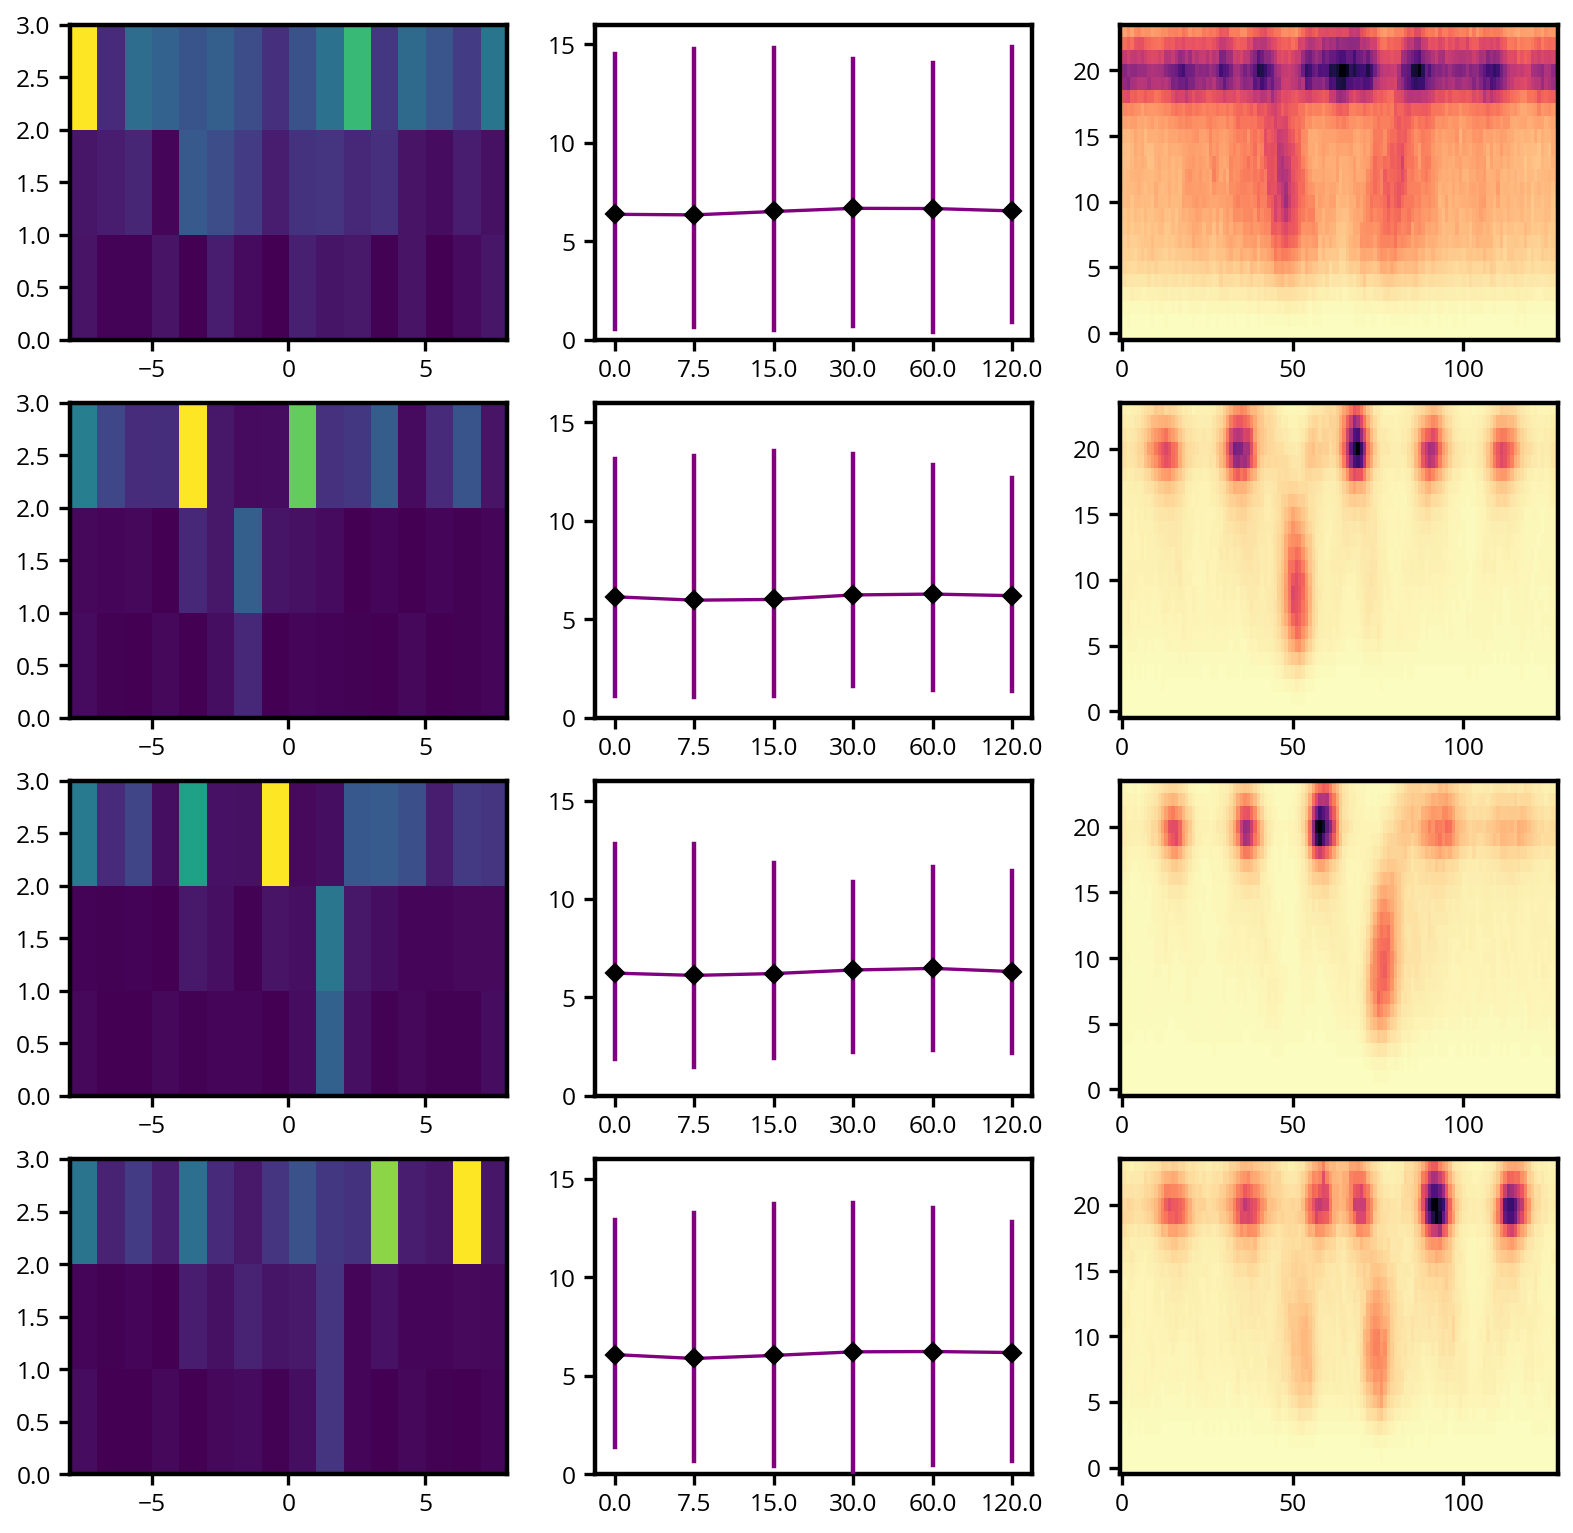

In [158]:
plt.figure(figsize=(12, 12))
for cluster in range(c):
    plt.subplot(c, 3, (cluster*3)+1)
    current_idx = np.arange(len(atts_120))[cd_120_cluster_labels == cluster]
    plt.imshow(atts_120[current_idx].mean(axis=0), origin='lower', extent=[-8, 8, 0, 3], aspect='auto')

    plt.subplot(c, 3, (cluster*3)+2)
    plot_tpm_cluster_idx(trainer, orfs_120, current_idx)
    
    plt.subplot(c, 3, (cluster*3)+3)
    imgs_120 = vit_data.all_imgs[idx_120]
    imgs_120[current_idx].mean(axis=0).shape
    plt.imshow(imgs_120[current_idx].mean(axis=0)[0], origin='lower', cmap='magma_r', aspect='auto')